In [525]:
import requests
import numpy as np

#класс для скачивания данных с сайта
class HouseData:
     
    atribut_classa = "HouseData" #один из способов задать атрибут класса
    
    def __init__(self, offset_, limit_):# вывод  списка айди домов
    
        #задали диапазон поиска домов
        self.offset_ = offset_
        self.limit_ = limit_
        self.url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
 
    def get_objids(self, count):
    
    #нашли айди домов 
        res = requests.get(self.url)
        objects_data = res.json()
        objects_data.get('data').get('list')[0]
        objects_list = objects_data.get('data').get('list')
        objids = [x.get('objId') for x in objects_list]
        if count == None:
            return objids[:len(objids)]
        else:
            return objids[:count]
        
        
    #поиск ссылки по всем объектам
    def get_urllist(self, objids, url_link):
        url_list = list()
        #url_link = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/'
        for i in objids:
            url_list.append(url_link+str(i))
        return url_list
    
    #поиск данных по всем ссылкам - на выходе список  с данными json
    def get_jsondata_bylink(self, url_list):
        import pandas as pd
        
        res_list = list()
        for i in url_list:
            res = requests.get(i)
            res_list.append(res.json())
        return res_list

        
    def normalize_data(self, res_list):
        import pandas as pd
        
        parsed_list = list()
        
        parsed_list = pd.json_normalize(res_list)

                 
        return parsed_list
    
    def dataframe_create(self,datalist): #Создать dataframe 
        datalist = self.normalize_data(datalist)
        df = pd.DataFrame(datalist)
        df.columns = df.columns.str.replace('data.', '')#убрали префикс у столбцов
        return df
        
           
hd = HouseData (1,100)
hd_objids= hd.get_objids(100)

url_list = hd.get_urllist(hd_objids, f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/')    
  
res_list = hd.get_jsondata_bylink(url_list)

#parced_list = hd.normalize_data(res_list)
#parced_list[0:5]

df = hd.dataframe_create(res_list)
df[0:5]

C:\Users\Жопка\AppData\Local\Temp\ipykernel_7328\13117986.py:62: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('data.', '')#убрали префикс у столбцов


,errcode,id,hobjId,pdId,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,...,metro.colors,transportDistIndex,transportDistIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,airQualityIndexValue,complexShortNm,greenAreaIndexValue
0,0,13383,39024,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,13398,37165,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,13397,37201,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,13399,34754,28141,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,10891,6541,23054,3006,ААК ВОЛОГДААГРОСТРОЙ,ААК ВОЛОГДААГРОСТРОЙ,АКЦИОНЕРНАЯ АГРОСТРОИТЕЛЬНАЯ КОМПАНИЯВОЛОГДААГ...,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [526]:
import pandas as pd
import json
#класс для приведения данных дата фрейма в должный вид
class DataFrame_parsing:

    
    def list_to_json(self,parsing_list): #  #переводим лист в формат джейсон:           
        dict_cell = eval(str(parsing_list))#переводим строку в словарь           
            #df_cell = df_cell.replace('\\"', '\"')
            #json_str = json.dumps(dict_cell, indent=4) #переводим словарь в формат джейсон
        return json.dumps(dict_cell, indent=4)
    
    
    def parsing_json_cells(self, df): # выя
        
        
        #инициализация датафрейма, для дальнейшего добавления в него столбцов из распарсенных ячеек
        parsed_cells_to_adding =pd.DataFrame(columns = ['id']) 

        stb_count= df.shape[1]  #количество столбцов
        str_count = df.shape[0] #количество строк

        temp_str = 0
        temp_stb = 0

        #в цикле по всем столбцам
        while temp_stb < stb_count:
            temp_str = 0 
    
            flag_merge = True #присоединяем новые столбцы, если первый раз в этом столбце нашли данные в формате json

            #в цикле по всем строкам
            while temp_str < str_count:

                #если в текущей ячейке первый симфол [, то это json и надо распарсить
                if (str(df.iat[temp_str,temp_stb])[0] == '[') and (str(df.iat[temp_str,temp_stb])[1] != ']'):

                    #делаем нормализацию - получаем из json датафрейм текущей ячейки
                    parsed_cell = pd.json_normalize(df.iat[temp_str,temp_stb])

                    key_before_merge = df.iat[temp_str,1] #получить "ключ" строки           
                    parsed_cell.insert(1, "id", key_before_merge) #вставляем в распарсенную новую табличку ключ

                    if flag_merge == True: #добавляем столбцы для существующей таблицы
                        parsed_cells_to_adding = parsed_cells_to_adding.merge(parsed_cell, how = 'outer', on = 'id')
                        flag_merge = False

                    else: #добавляем значения для существующих столбцов 
                        parsed_cells_to_adding = parsed_cells_to_adding.append(parsed_cell, ignore_index = True )


                temp_str+=1
            if flag_merge == False: # удалить cтолбец с нераспарсенным значением!            
                df.drop (df.columns [temp_stb], axis= 1 , inplace= True )
                stb_count-=1
            else:    
                temp_stb+=1

        df = df.merge(parsed_cells_to_adding, how = 'outer', on = 'id') #соединяем содержимое распарсенных ячеек с исхдной таблицей
        
        #добавляем ключевое поле??
        

        return df
  
    
#Привести колонки датафрейма к одному типу данных
    def to_one_type(self, df):
 
        temp_str = 0
        temp_stb = 0

        #в цикле по всем столбцам
        while temp_stb < df.shape[1]:
            temp_str = 0 
    
            flag_first_string = True #первая строка
            first_type = None
            #в цикле по всем строкам
            while temp_str < df.shape[0]:

            
                if (flag_first_string == True):#найти тип данных в первой строке
                    first_type = type(df.iat[temp_str,temp_stb])                  
                    flag_first_string = False
                else: 
                    #проверить, совпадает ли тип данных с остальными строками в столбце
                    if first_type != type(df.iat[temp_str,temp_stb]):
                        
                        #если не совпадает, то преобразуем все строки этого столбца в стринг
                        
                        df.iloc[:, temp_stb] = df.iloc[:, temp_stb].astype('string')
                        #df["pdId"] = df["pdId"].astype('string')

                        #и переходим к новому столбцу                    
                        break
                    
                temp_str+=1
                
            temp_stb+=1
        return df

#Проверить индекс, чтобы он соответствовал порядку строк
    def sort(self, df, stb_names):
 
        df=df.sort_values(stb_names).sort_index()      
        return df


#Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
    def delete_empty_values1(self, df):
       # df=df[df[stb_names]!='']
        #df=df.sort_values(stb_names)  
        is_null = df.isna().sort_index() #создаем датафрейм с признаком, является ли значение нулевым
        row_with_null = is_null.any(axis=1).sort_index()
        rows_with_null = df[row_with_null] #берем только 
        
        return  rows_with_null
    
#Проверить наличие пропусков и в случае обнаружения,удалить все строки, где есть хоть одно пустое значение
    def delete_empty_values_at_all(self, df):        
        df = df.dropna()        
        return  df
    
#Проверить наличие пропусков и в случае обнаружения, удалить все строки, где есть как минимум limit определенных значений
    def delete_empty_values_over_limit(self, df, limit):
        count_non_empty = df.shape[1]-limit+2
        df = df.dropna(thresh = count_non_empty)
        return  df
    
#Проверить наличие пропусков в заданных столбцах , и, в случае обнаружения, удалить
    def delete_empty_values(self, df, stb_names):
       # df=df[df[stb_names]!='']
        #df=df.sort_values(stb_names)  
        df = df.dropna(subset=stb_names)
        
        return  df    
    

df_p = DataFrame_parsing()

#df = df_p.parsing_json_cells(df) #получаем таблицу с распарсенными ячейками,в которых хранятся данные о фото

df = df_p.to_one_type(df) #Привести колонки датафрейма к одному типу данных

#df = df_p.sort(df,["id","hobjId"])
df = df_p.sort(df,["id"])
          

#df= df_p.delete_empty_values_over_limit(df,3)#оставляем строки, в которых меньше или равно 3 значениям пропущено
#df = df.dropna(thresh=93)

#удалить столбцы, в которых одинаковое значение???
    


df.to_excel('d1.xlsx', sheet_name ='houses', index= False)

print(df.head())




  errcode     id  hobjId   pdId  developer.devId developer.devShortCleanNm  \
0       0  13383   39024  28105              306                2МЕН ГРУПП   
1       0  13398   37165  28141              306                2МЕН ГРУПП   
2       0  13397   37201  28141              306                2МЕН ГРУПП   
3       0  13399   34754  28141              306                2МЕН ГРУПП   
4       0  10891    6541  23054             3006      ААК ВОЛОГДААГРОСТРОЙ   

   developer.devShortNm                           developer.devFullCleanNm  \
0            2МЕН ГРУПП                                         2МЕН ГРУПП   
1            2МЕН ГРУПП                                         2МЕН ГРУПП   
2            2МЕН ГРУПП                                         2МЕН ГРУПП   
3            2МЕН ГРУПП                                         2МЕН ГРУПП   
4  ААК ВОЛОГДААГРОСТРОЙ  АКЦИОНЕРНАЯ АГРОСТРОИТЕЛЬНАЯ КОМПАНИЯВОЛОГДААГ...   

   developer.problObjCnt  developer.buildObjCnt  ...  metro.co

In [ ]:
Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах 
с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. -
- Рассчитать объемы вводимого жилья по регионам и по годам. -
- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах -
- Визуализировать разброс, связь и распределение этих показателей по регионам -
- Сделать выводы по каждому из расчетов и графиков

In [527]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#класс для построения графиков
class DataFrame_graphics:
   # def __init__(self):# 

#считаем среднее значение показателей по каждому stb_kind_of_key и выводим график 

    def graphic_mean(self, dframe,stb_names, stb_kind_of_key, kind_of_diagram ): 
        
        #удаляем строки с пустые значения из нужных столбцов
        df_p1 = DataFrame_parsing() 
        df_middle = df_p1.delete_empty_values(dframe, stb_names)

        df_middle = df_middle[stb_names]#оставляем только определенные столбцы

        df_middle = df_middle.groupby(stb_kind_of_key).mean() #вычисление среднего значения

        df_middle.plot(kind=kind_of_diagram)
        plt.show()
        return df_middle

#считаем суммарное значение показателей по каждому stb_kind_of_key и выводим график    
    def graphic_sum(self, dframe,stb_names, stb_kind_of_key,kind_of_diagram): 
        
        #удаляем строки с пустые значения из нужных столбцов
        df_p1 = DataFrame_parsing() 
        df_sum  = dframe[stb_names]
        df_sum = df_p1.delete_empty_values(df_sum, stb_names)

        #находим суммарный объем для кажого stb_kind_of_key
        df_sum = df_sum.groupby(stb_kind_of_key).sum()

        df_sum.plot(kind=kind_of_diagram)
        plt.show()

        return df_sum    
    
#считаем суммарное значение показателей по каждому stb_kind_of_key и выводим график    
    def graphic_minmax(self, dframe,stb_names_min, stb_names_max, stb_kind_of_key,kind_of_diagram): 
        
        #удаляем строки с пустые значения из нужных столбцов
        df_p1 = DataFrame_parsing() 
        df_floormin  = dframe[stb_names_min]
        df_floormin = df_p1.delete_empty_values(df_floormin, stb_names_min)
        df_floormax  = dframe[stb_names_max]
        df_floormax = df_p1.delete_empty_values(df_floormax, stb_names_max)

        df_floormin = df_floormin.groupby([stb_kind_of_key]).min()
        df_floormax = df_floormax.groupby([stb_kind_of_key]).max()
        df_floors = df_floormin.merge(df_floormax,how = 'outer', on = stb_kind_of_key)
     
        df_floors.plot(kind='barh')
        plt.show()       
           
        return df_floors  
    
    def graphic_relationship_sumy(self, dframe, x, y): 
        
        
        df_p1 = DataFrame_parsing() 
        dframe  = dframe[[x, y]]
        
        #удаляем строки с пустые значения из нужных столбцов
        dframe = df_p1.delete_empty_values(dframe, [x])
        dframe = df_p1.delete_empty_values(dframe, [y])
        
        #суммируем значения y для каждого x
        dframe= dframe.groupby([x]).sum().reset_index()
        #dframe= dframe.groupby([y]).sum().reset_index()
        
        #сортировать!?
       
        plt.plot(dframe[x], dframe[y])
        plt.show() 
       
        return dframe

    #несколько линий на одном графике
    #x - номер столбца для временная шкала
    def some_graphics_relationship_sumy(self, dframe, x, y, stb_name_lines): 
        
        
        df_p1 = DataFrame_parsing() 
        dframe  = dframe[[x, y, stb_name_lines]]
        
        #удаляем строки с пустыми значениями из нужных столбцов
        dframe = df_p1.delete_empty_values(dframe, [x])
        dframe = df_p1.delete_empty_values(dframe, [y])
        dframe = df_p1.delete_empty_values(dframe, [stb_name_lines])
        
        
        #находим серию городов
        lines= dframe.groupby([stb_name_lines]).sum().reset_index()[stb_name_lines]
        
       # print(lines)
        for i in lines:
            
            
            dframe1 = dframe[dframe[stb_name_lines] == i] # создаем новую табличку с определенным значением stb_name_lines
            
            line_name = i
        #суммируем значения y для ^каждого x
            dframe1= dframe1.groupby([x]).sum().reset_index()
           
            plt.plot(dframe1[x], dframe1[y])
        
        plt.show() 
       
        return dframe    
    


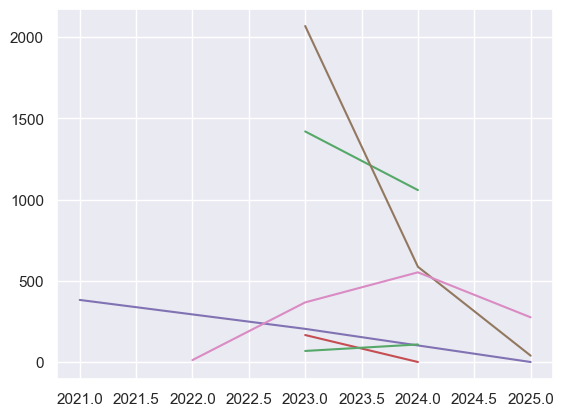

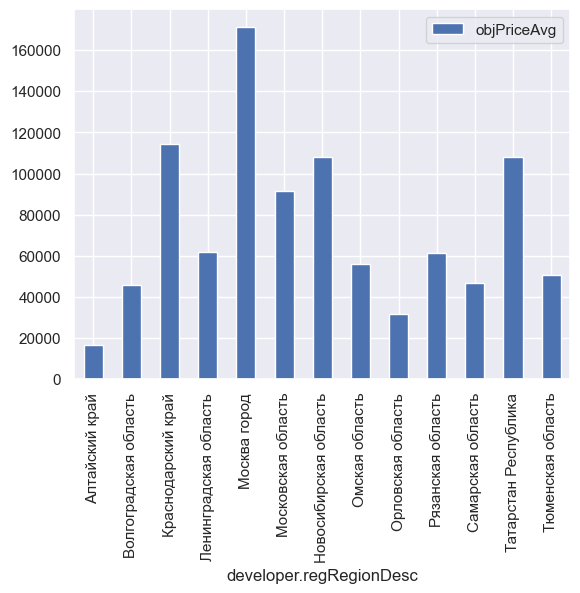

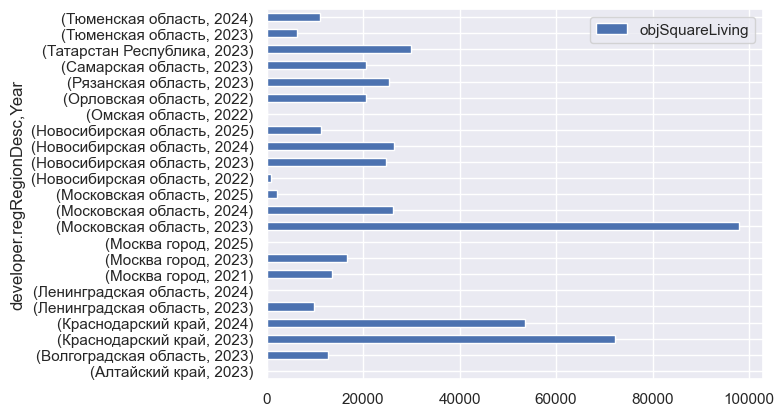

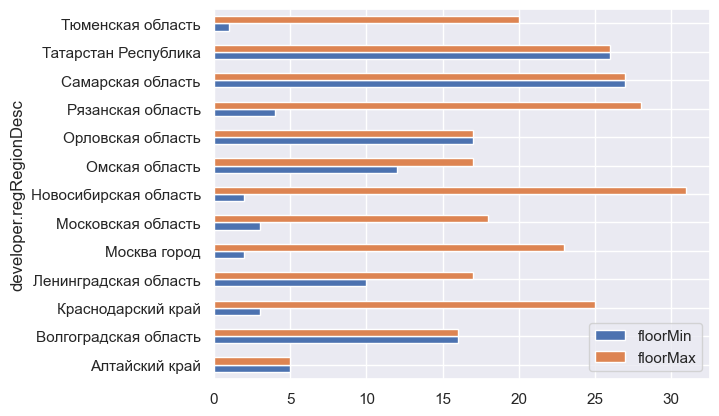

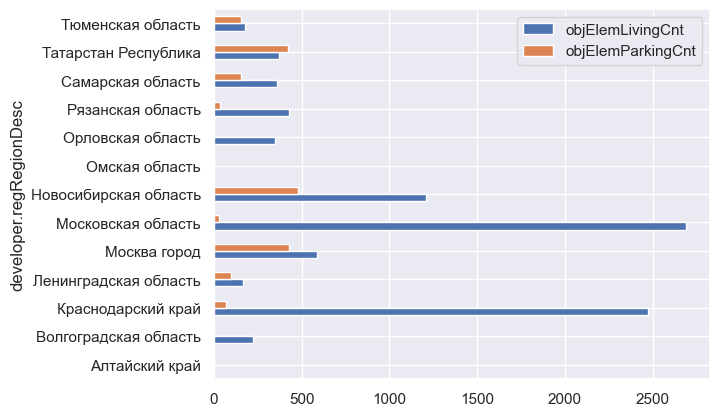

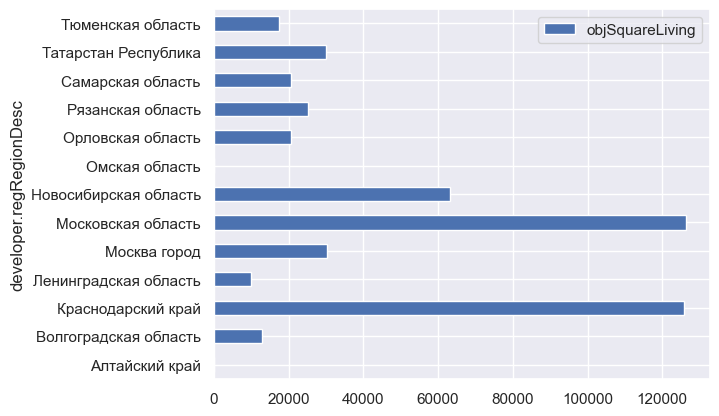

In [529]:
g = DataFrame_graphics()


# сначала добавим столбец с годом
df['Year'] = pd.DatetimeIndex(df['objReady100PercDt']).year


# линейная связь различных показателей

#df_legend_data = g.graphic_relationship_sumy( df, 'developer.regRegionDesc', "objPriceAvg")
#df_legend_data = g.graphic_relationship_sumy( df, 'developer.regRegionDesc', "objElemLivingCnt")
#df_legend_data = g.graphic_relationship_sumy( df, 'objPriceAvg', "objElemLivingCnt")
#df_legend_data = g.graphic_relationship_sumy( df, 'floorMax', "objElemLivingCnt")

df_legend_data = g.some_graphics_relationship_sumy( df, 'Year', "objElemLivingCnt", 'developer.regRegionDesc')

#Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. 
df_legend_data1 = g.graphic_mean(df, ['objPriceAvg', "developer.regRegionDesc"], ["developer.regRegionDesc"], 'bar')


#Рассчитать объемы вводимого жилья по регионам и по годам.
df_legend_data2 = g.graphic_sum(df, ['objReady100PercDt', "developer.regRegionDesc", "objSquareLiving","Year"], ["developer.regRegionDesc","Year"], 'barh')

#Сравнить этажность домов, 
df_legend_data = g.graphic_minmax(df, ['developer.regRegionDesc', "floorMin"], ['developer.regRegionDesc', "floorMax"], "developer.regRegionDesc", 'barh')

#Сравнить количество квартир и паркингов по регионам
df_legend_data = g.graphic_sum(df, ['developer.regRegionDesc', "objElemLivingCnt","objElemParkingCnt"], ["developer.regRegionDesc"], 'barh')

#Сравнить жилую площадь
df_legend_data_count = g.graphic_sum(df, ['developer.regRegionDesc', "objSquareLiving"], ["developer.regRegionDesc"], 'barh')






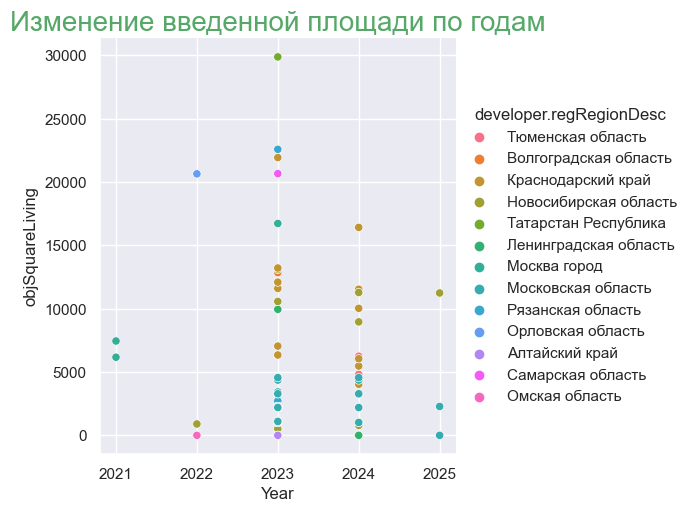

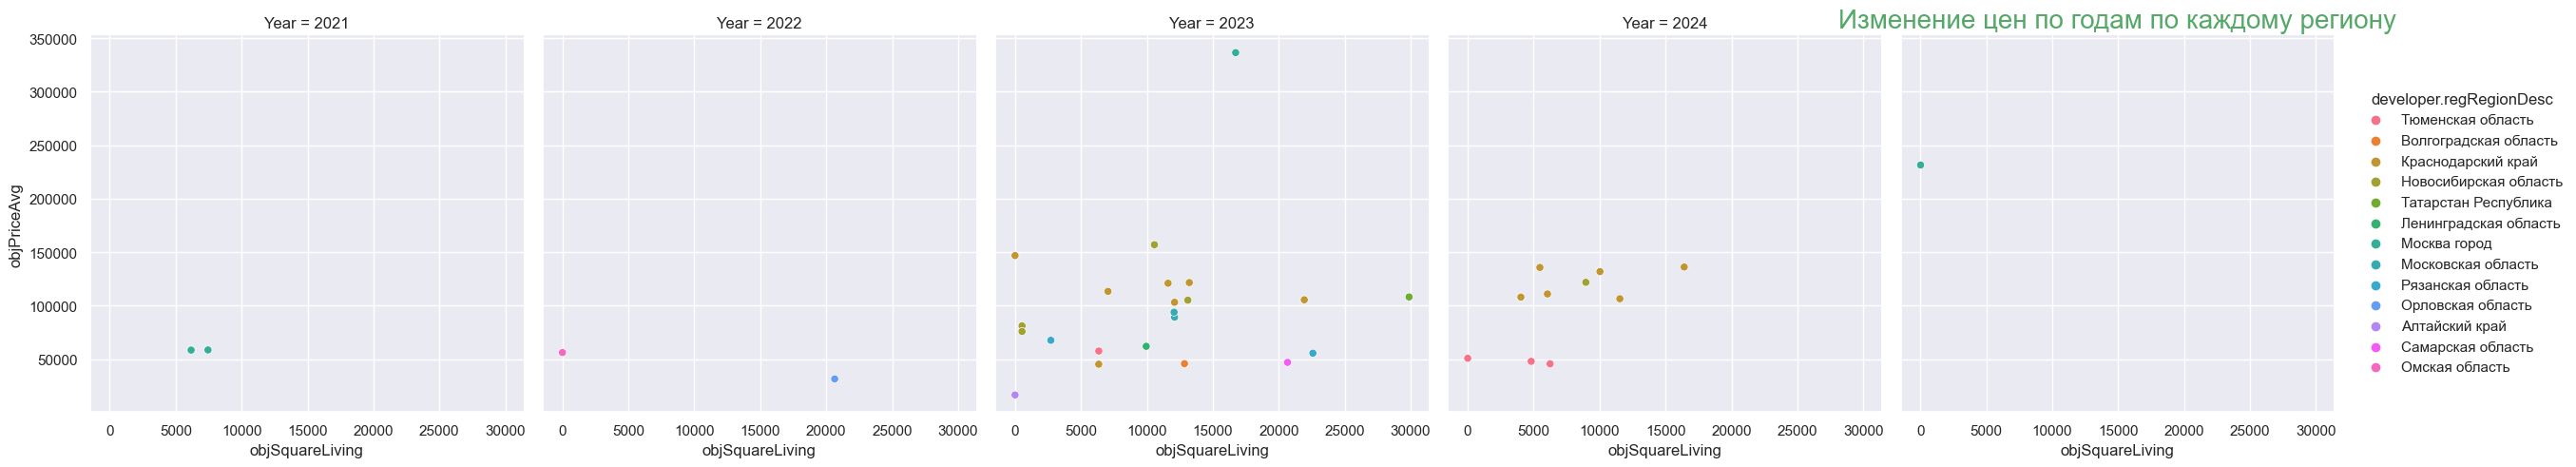

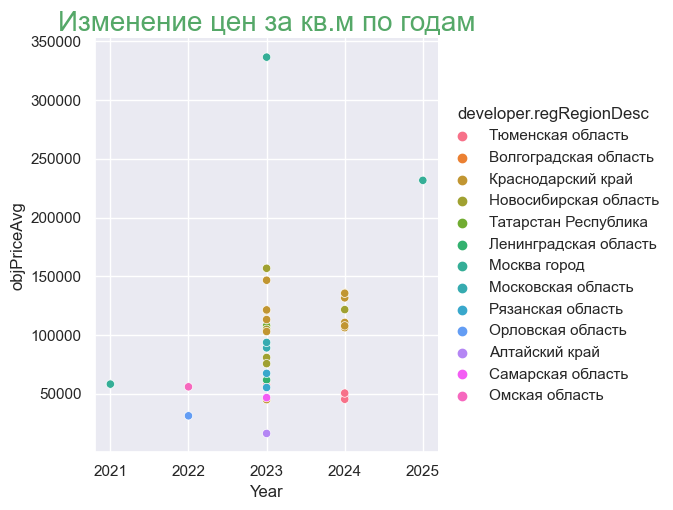

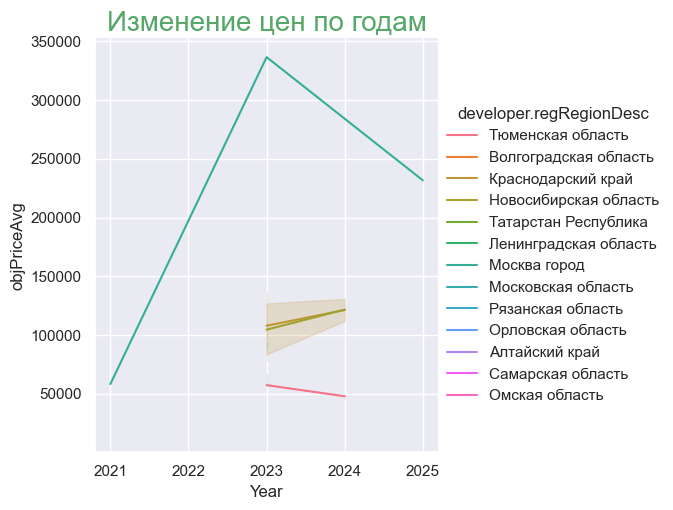

In [530]:

import seaborn as sns

# линейная связь различных показателей , несколько графиков 
# ось  x - годы, y - определенные показатели, каждый график относится к региону
#print(df)
#.reset_index()

class seaborn_graphics:
    def universal_diagram(self, dframe, stb_x, stb_y, stb_hue, diagram_kind, diagram_name): 
        sns.set(style='darkgrid')
        sns.relplot(
            data=dframe,
            x = stb_x, 
            y = stb_y, 
            hue = stb_hue, 
           # hue_order=df[["developer.regRegionDesc"]],
           # aspect=4,
            kind=diagram_kind
        )
        plt.title(diagram_name, size=20, color='g');
        return
    
    def universal_group_diagram(self, dframe, stb_x, stb_y, stb_hue, diagram_kind, diagram_name, col, col_order, height ): 
        sns.set(style='darkgrid')
        sns.relplot(
            data=dframe,
            x = stb_x, 
            y = stb_y, 
            hue = stb_hue, 
            col = col,
            #col_order = col_order,
            height = height,
           # hue_order=df[["developer.regRegionDesc"]],
           # aspect=4,
            kind=diagram_kind
        )
        plt.title(diagram_name, size=20, color='g');
        return
   
    
    def lin_diagram(self, dframe, stb_x, stb_y, stb_hue, diagram_name): 
        sns.set(style='darkgrid')
        sns.lineplot(
            data=dframe,
            x= stb_x, 
            y= stb_y, 
            hue=stb_hue, 
           # hue_order=df[["developer.regRegionDesc"]],
           # aspect=4,
            
        )
        plt.title(diagram_name, size=20, color='g');
        return   
    
    

sg = seaborn_graphics()    
#разброс
sg.universal_diagram(df, "Year","objSquareLiving","developer.regRegionDesc",'scatter', "Изменение введенной площади по годам")

sg.universal_group_diagram(
    df, "objSquareLiving","objPriceAvg","developer.regRegionDesc",
    'scatter', "Изменение цен по годам по каждому региону", "Year", None,
    5 )
#sg.universal_group_diagram(df, "objSquareLiving","objPriceAvg","Year",
#    'scatter', "Изменение цен по регионам по каждому году", "developer.regRegionDesc", None, 5 )

sg.universal_diagram(df, "Year","objPriceAvg","developer.regRegionDesc",'scatter', "Изменение цен за кв.м по годам")    
sg.universal_diagram(df, "Year","objPriceAvg","developer.regRegionDesc",'line', "Изменение цен по годам")


#sg.lin_diagram(df_legend_data2, "Year","objSquareLiving","developer.regRegionDesc", "Изменение площади по годам")

#sns.lineplot(data=df, x="Year", y="objSquareLiving", hue="developer.regRegionDesc")



In [524]:
class SaveData:
    def dataframe_create(self, data_list): #Создать dataframe 
        import pandas as pd
        df = pd.DataFrame(data_list)
        df.columns = df.columns.str.replace('data.', '')#убрали префикс у столбцов
        return df
    

    
    def save_to_excel(self, data_list, file_name): #Cохранить pandas dataframe в excel
        
        df = self.dataframe_create(data_list)
        df.to_excel(file_name, sheet_name ='houses', index= False)
        
        
    def save_to_pickle(self, data_list, file_name): #Cохранить pandas dataframe в pickle
        df = self.dataframe_create(data_list)       
        df.to_pickle(file_name)
    
    def save_to_bd(self, data_list, table_name): #Cохранить pandas dataframe в БД
        from sqlalchemy import create_engine
        engine = create_engine('sqlite://', echo=False)
        
       # import sqlite3
        #conn = sqlite3.connect('test_database')        
        df = self.dataframe_create(data_list)
        df = df.applymap(str)     
        df.to_sql(table_name, con = engine, if_exists='replace', index = False)
        #print(engine.execute("SELECT * FROM data").fetchall())
        
sd = SaveData()
sd.save_to_excel(parced_list, 'd1.xlsx')

C:\Users\Жопка\AppData\Local\Temp\ipykernel_7328\3199178807.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('data.', '')#убрали префикс у столбцов


In [ ]:




sd.save_to_excel(res_list, 'd1.xlsx')
#!pip install openpyxl
sd.save_to_pickle(res_list, 'd2.pkl')
sd.save_to_bd(res_list, 'data')

#задание 2
#Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных
#Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
